In [1]:
from pycigar.utils.input_parser import input_parser

In [2]:
misc_inputs = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/misc_inputs.csv'
dss = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/ieee37.dss'
load_solar = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/load_solar_data.csv'
breakpoints = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/breakpoints.csv'

start = 11000
sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True, vectorized_mode=False, percentage_hack=0.45)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]
sim_params['scenario_config']['custom_configs']['load_scaling_facor'] = 1.5
sim_params['scenario_config']['custom_configs']['solar_scaling_factor'] = 3
sim_params['scenario_config']['custom_configs']['slack_bus_voltage'] = 1.06

sim_params['simulation_config']['custom_configs']['solution_control_mode'] = 2

del sim_params['attack_randomization']

from pycigar.utils.registry import register_devcon
from pycigar.devices.battery_storage_device import BatteryStorageDevice
from pycigar.controllers.battery_storage_controller import BatteryStorageController
register_devcon('battery_storage_device', BatteryStorageDevice)
register_devcon('battery_storage_controller', BatteryStorageController)

battery_device = {
    'name': 'battery_s701a',
    'device': 'battery_storage_device',
    'custom_device_configs': {
        'default_control_setting': 'auto_minmax_cycle'
    },
    'controller': 'battery_storage_controller',
    'custom_controller_configs': {
        'default_control_setting': 'auto_minmax_cycle'
    }
}
sim_params['scenario_config']['nodes'][0]['devices'].append(battery_device)


In [3]:
from pycigar.utils.registry import register_devcon
from pycigar.controllers.adaptive_unbalanced_fixed_controller import AdaptiveUnbalancedFixedController
register_devcon('adaptive_unbalanced_fixed_controller', AdaptiveUnbalancedFixedController)


'adaptive_unbalanced_fixed_controller'

In [4]:
#ray.init()
from pycigar.envs import CentralControlPVInverterEnv

env = CentralControlPVInverterEnv(sim_params=sim_params)

In [5]:
env.reset()
done = False
#while not done:
_, _, done, _ = env.step(5)

In [ ]:
import opendssdirect as dss
dss.

In [5]:
from pycigar.utils.logging import logger
Logger = logger()

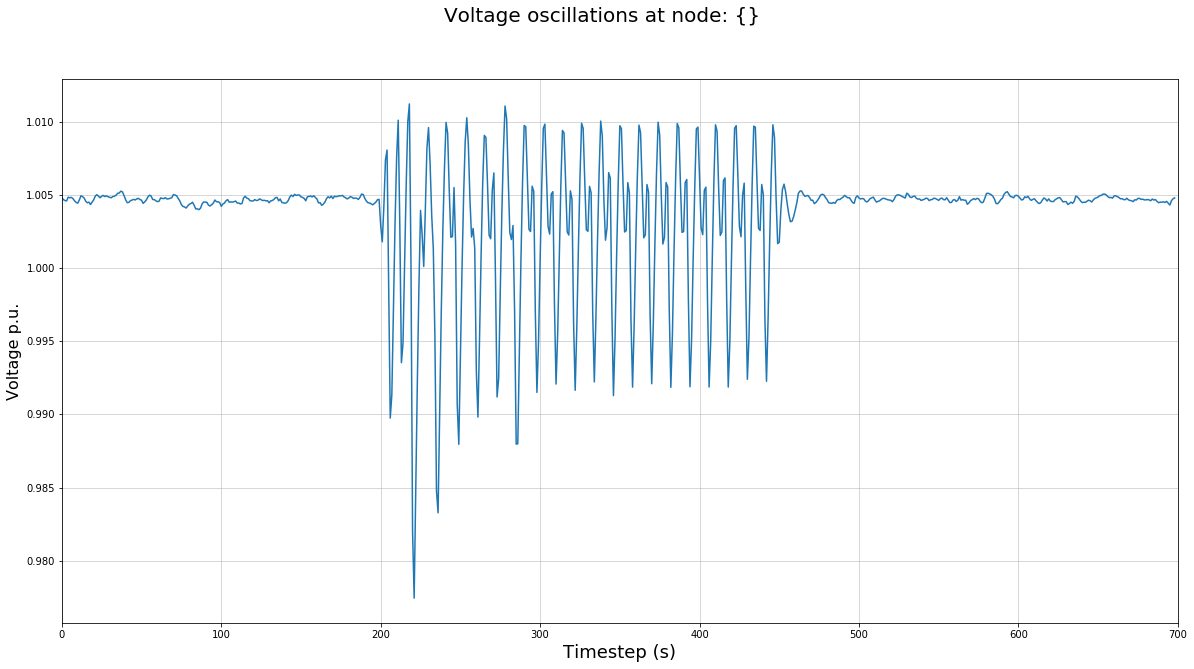

In [6]:
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize=(20, 10))

ax.grid(linestyle='-', linewidth=0.5)
ax.set_xlim([0, 700])
node_id = 's701a'
f.suptitle('Voltage oscillations at node: {}', fontsize=20)
plt.xlabel('Timestep (s)', fontsize=18)
plt.ylabel('Voltage p.u.', fontsize=16)
ax.plot(Logger.log_dict[node_id]['voltage'])
plt.show()

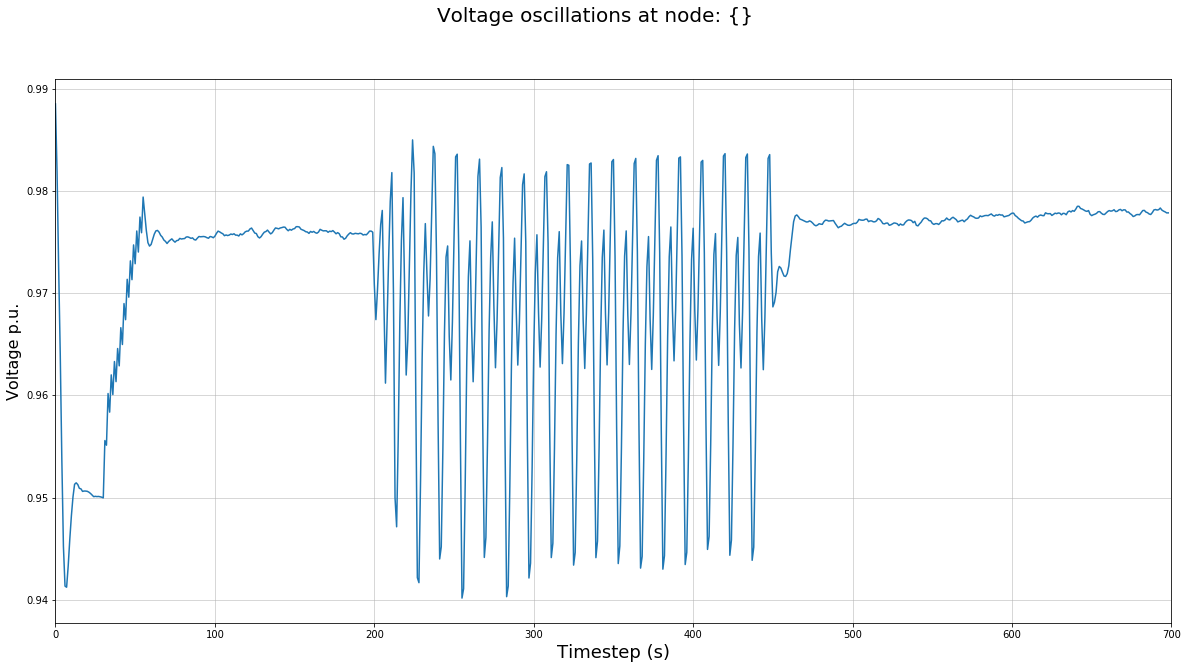

In [7]:
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize=(20, 10))

ax.grid(linestyle='-', linewidth=0.5)
ax.set_xlim([0, 700])
node_id = 's701a'
f.suptitle('Voltage oscillations at node: {}', fontsize=20)
plt.xlabel('Timestep (s)', fontsize=18)
plt.ylabel('Voltage p.u.', fontsize=16)
ax.plot(Logger.log_dict[node_id]['voltage'])
plt.show()

from pycigar.utils.output import plot_new
log_dict = Logger.log_dict
custom_metrics = Logger.custom_metrics
plot_new(log_dict, custom_metrics, epoch='', unbalance=True, multiagent=False)

from pycigar.utils.output import plot_new
log_dict = Logger.log_dict
custom_metrics = Logger.custom_metrics
plot_new(log_dict, custom_metrics, epoch='', unbalance=True, multiagent=False)

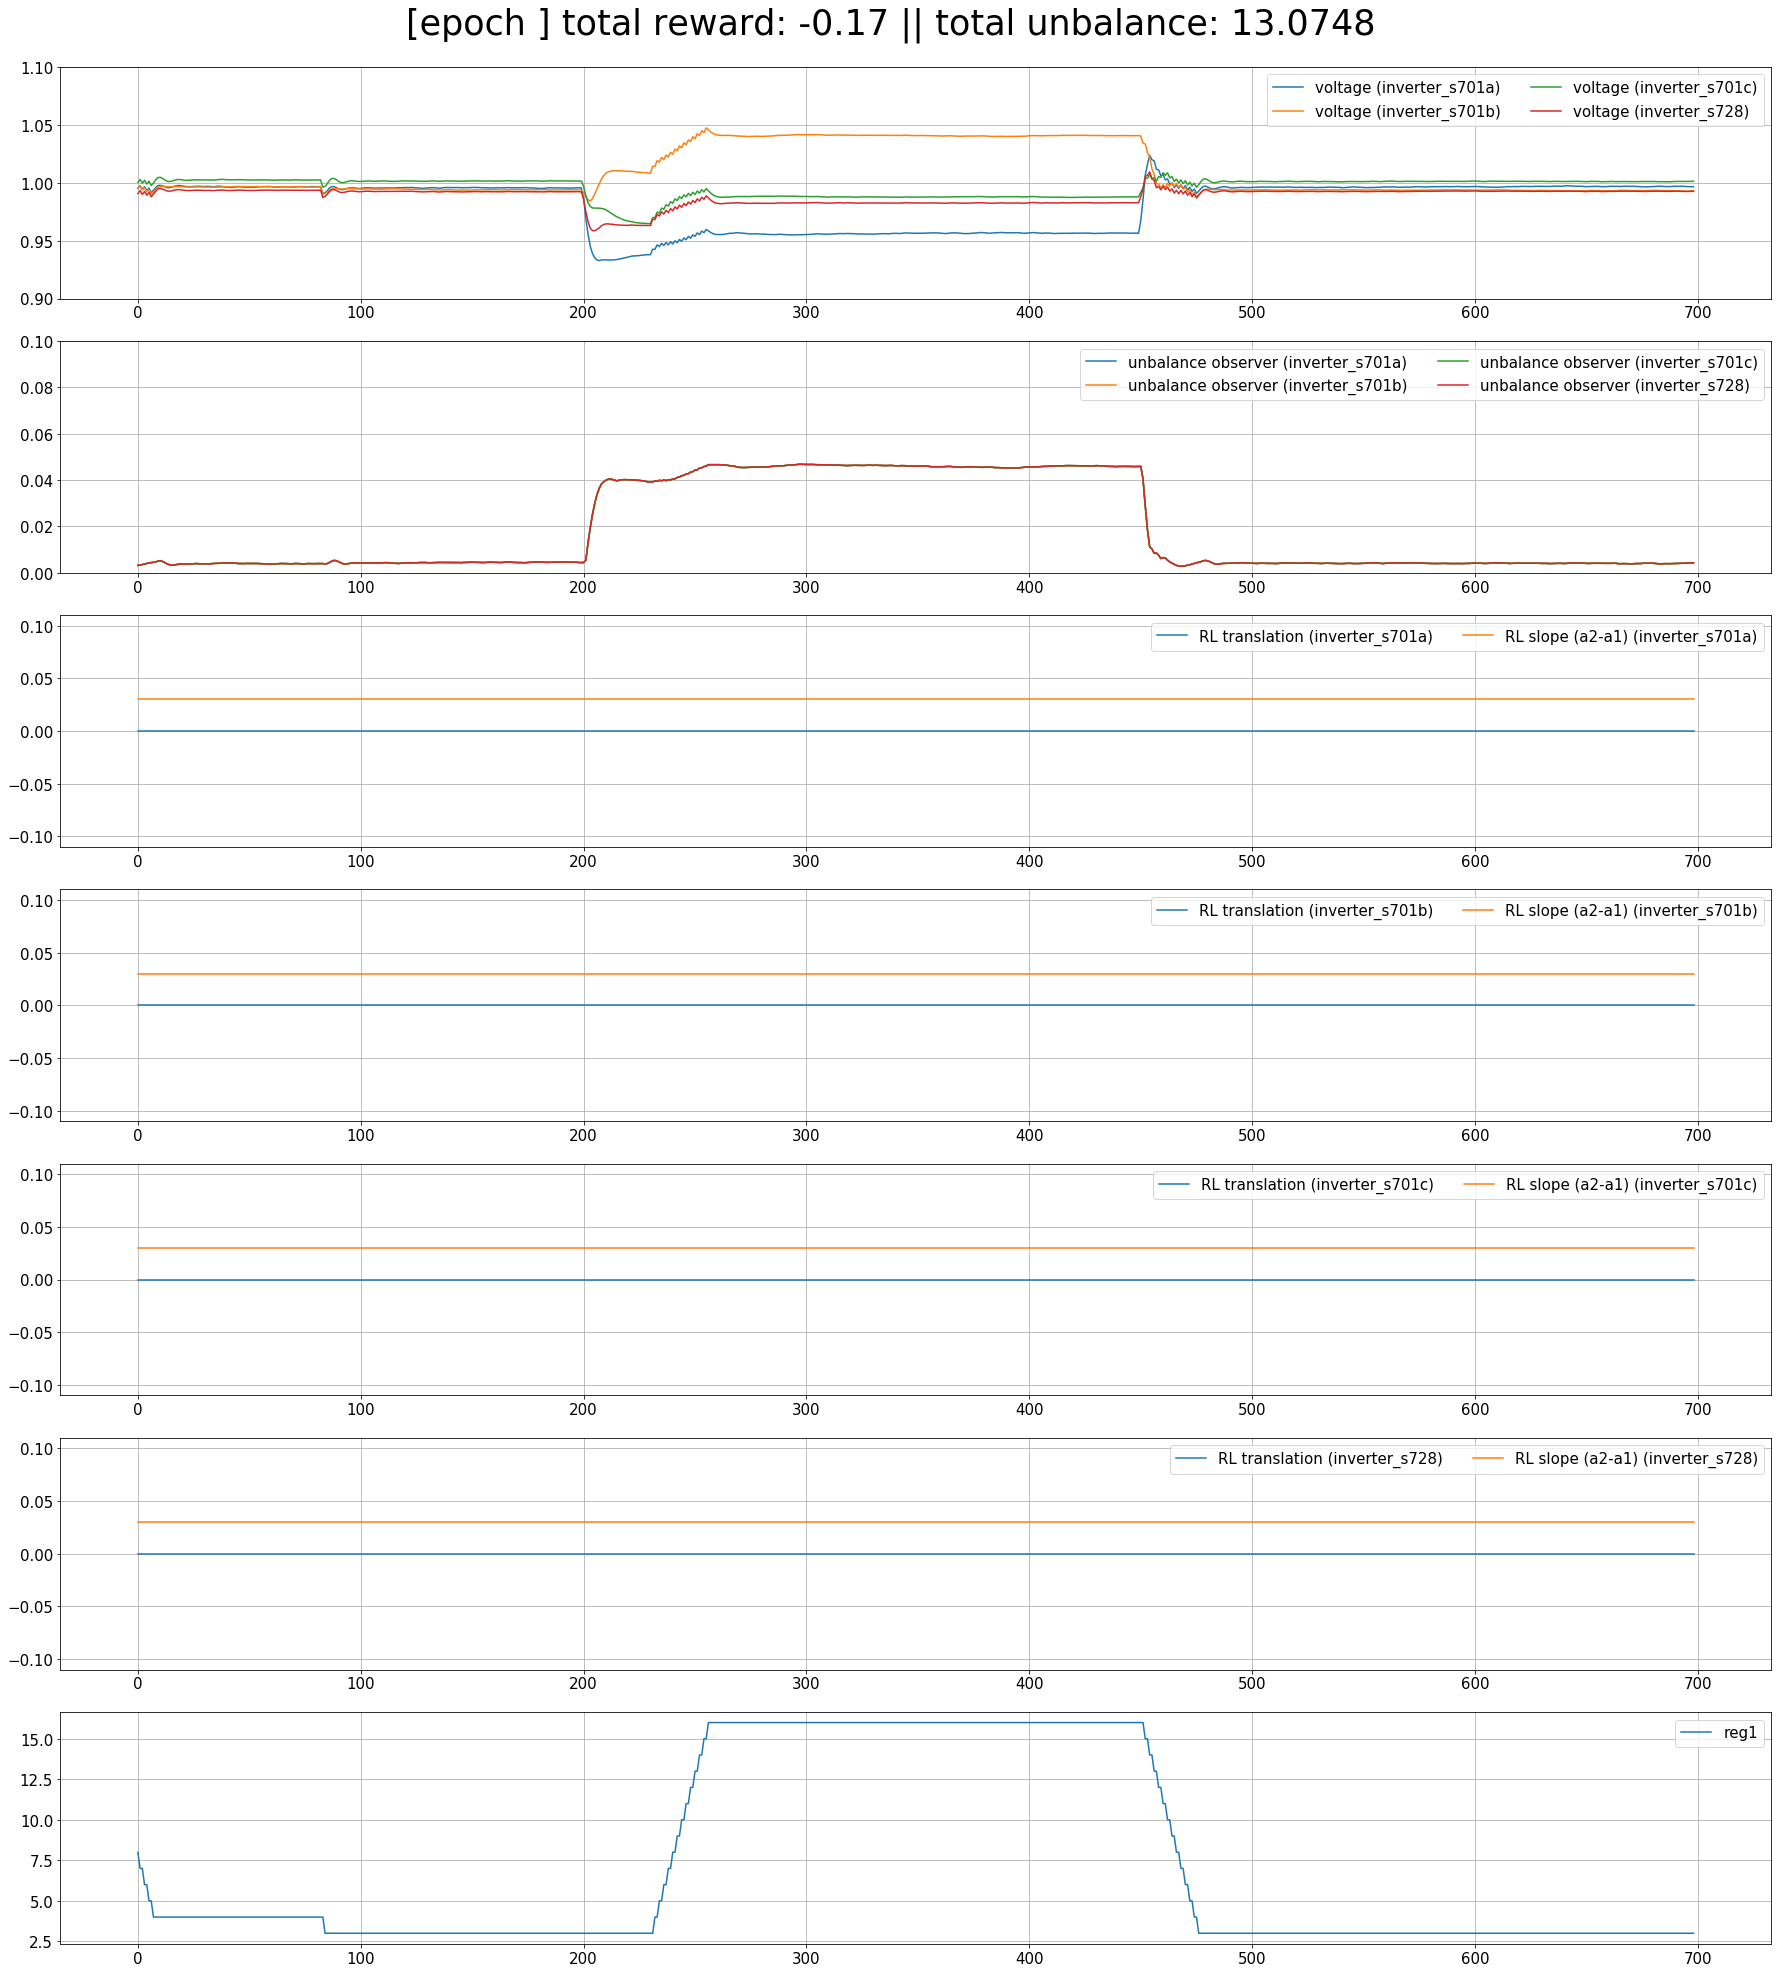

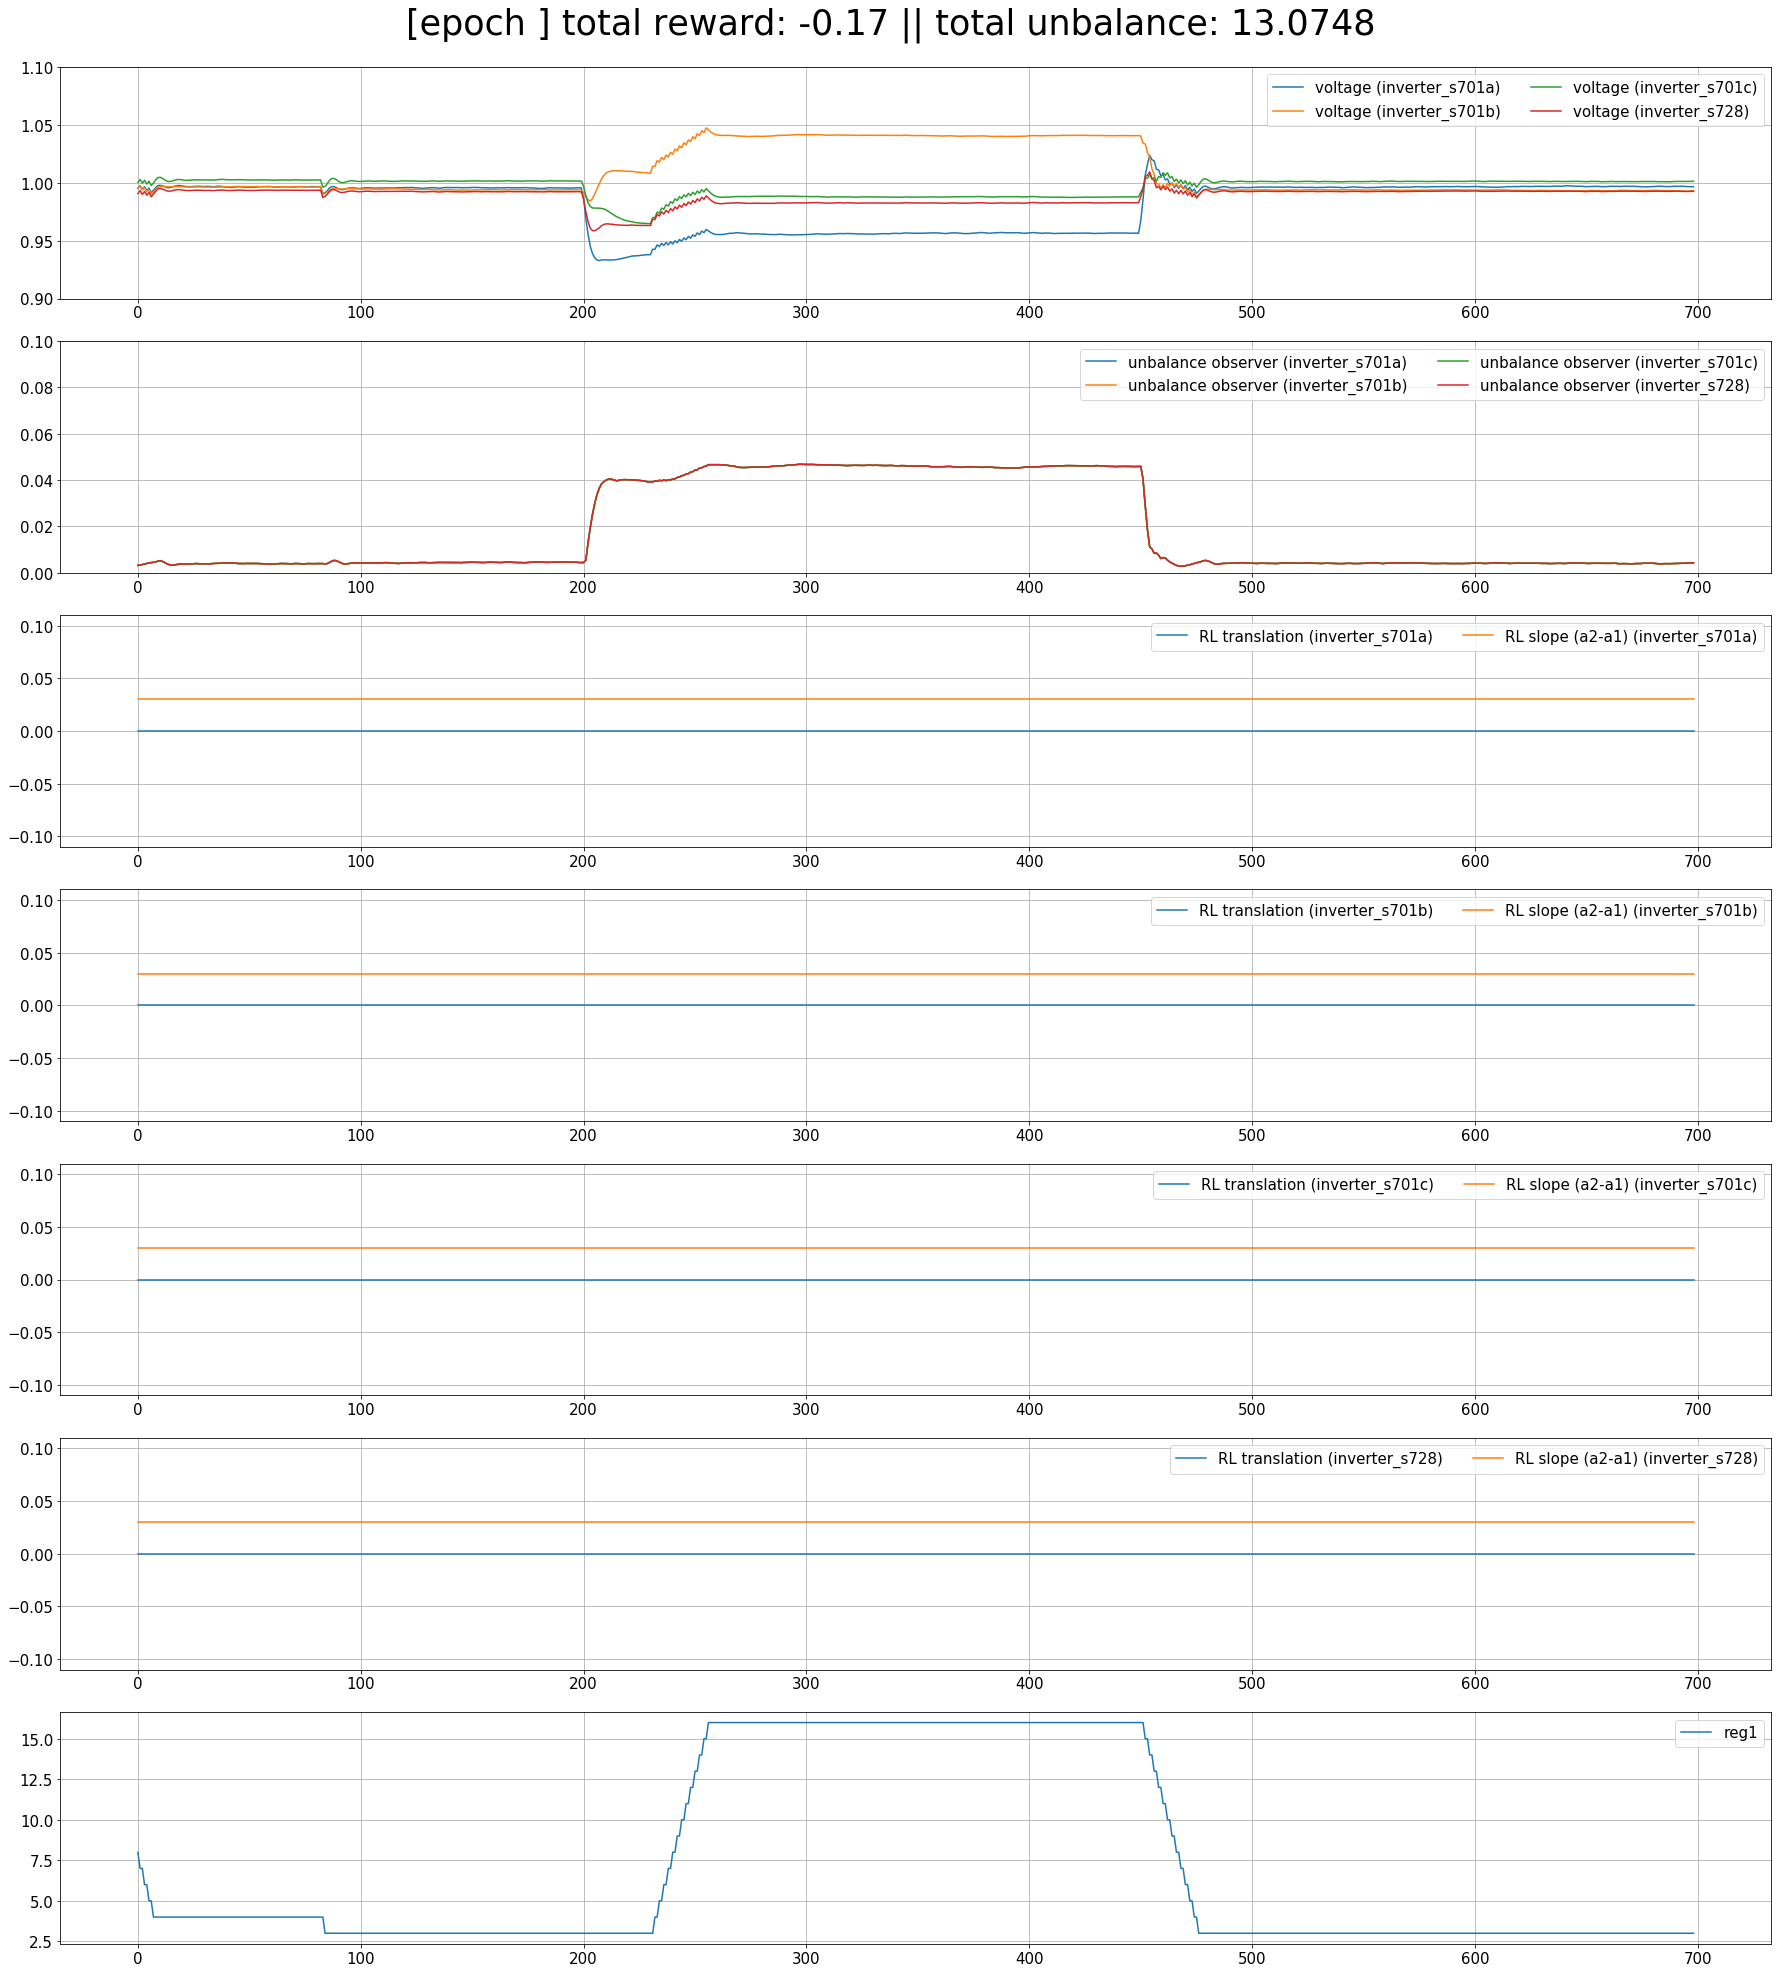

In [7]:
from pycigar.utils.output import plot_new

plot_new(Logger.log_dict, Logger.custom_metrics, unbalance=True)

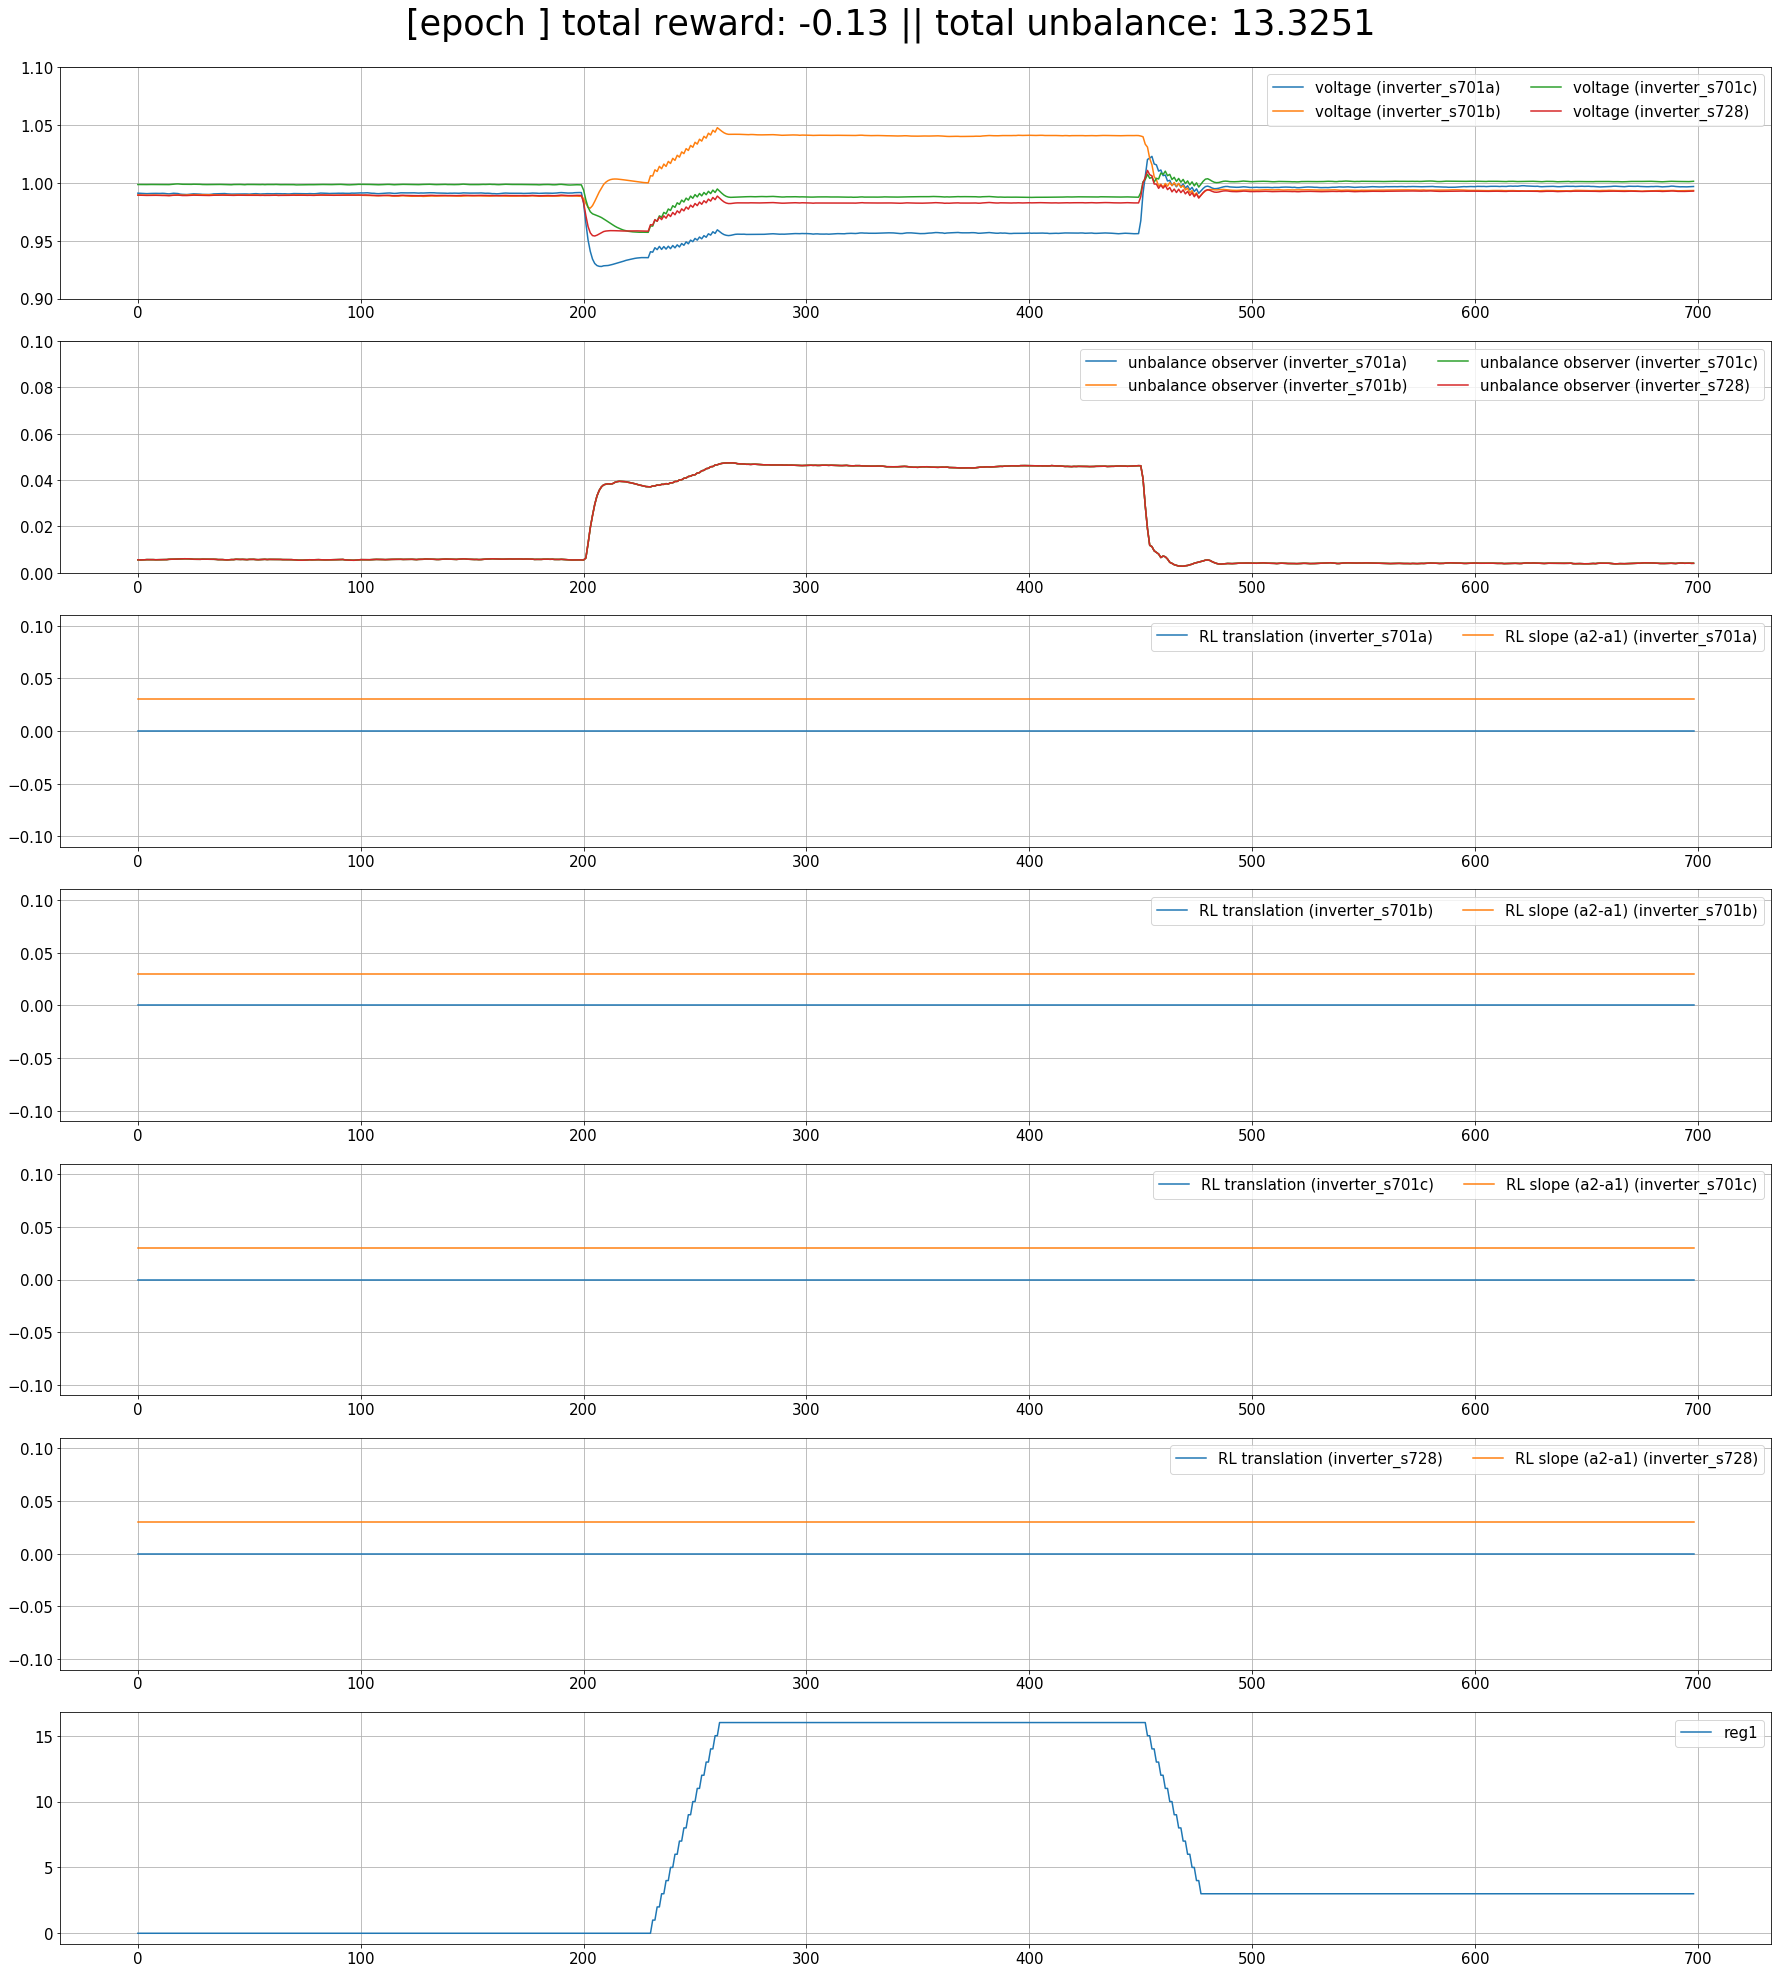

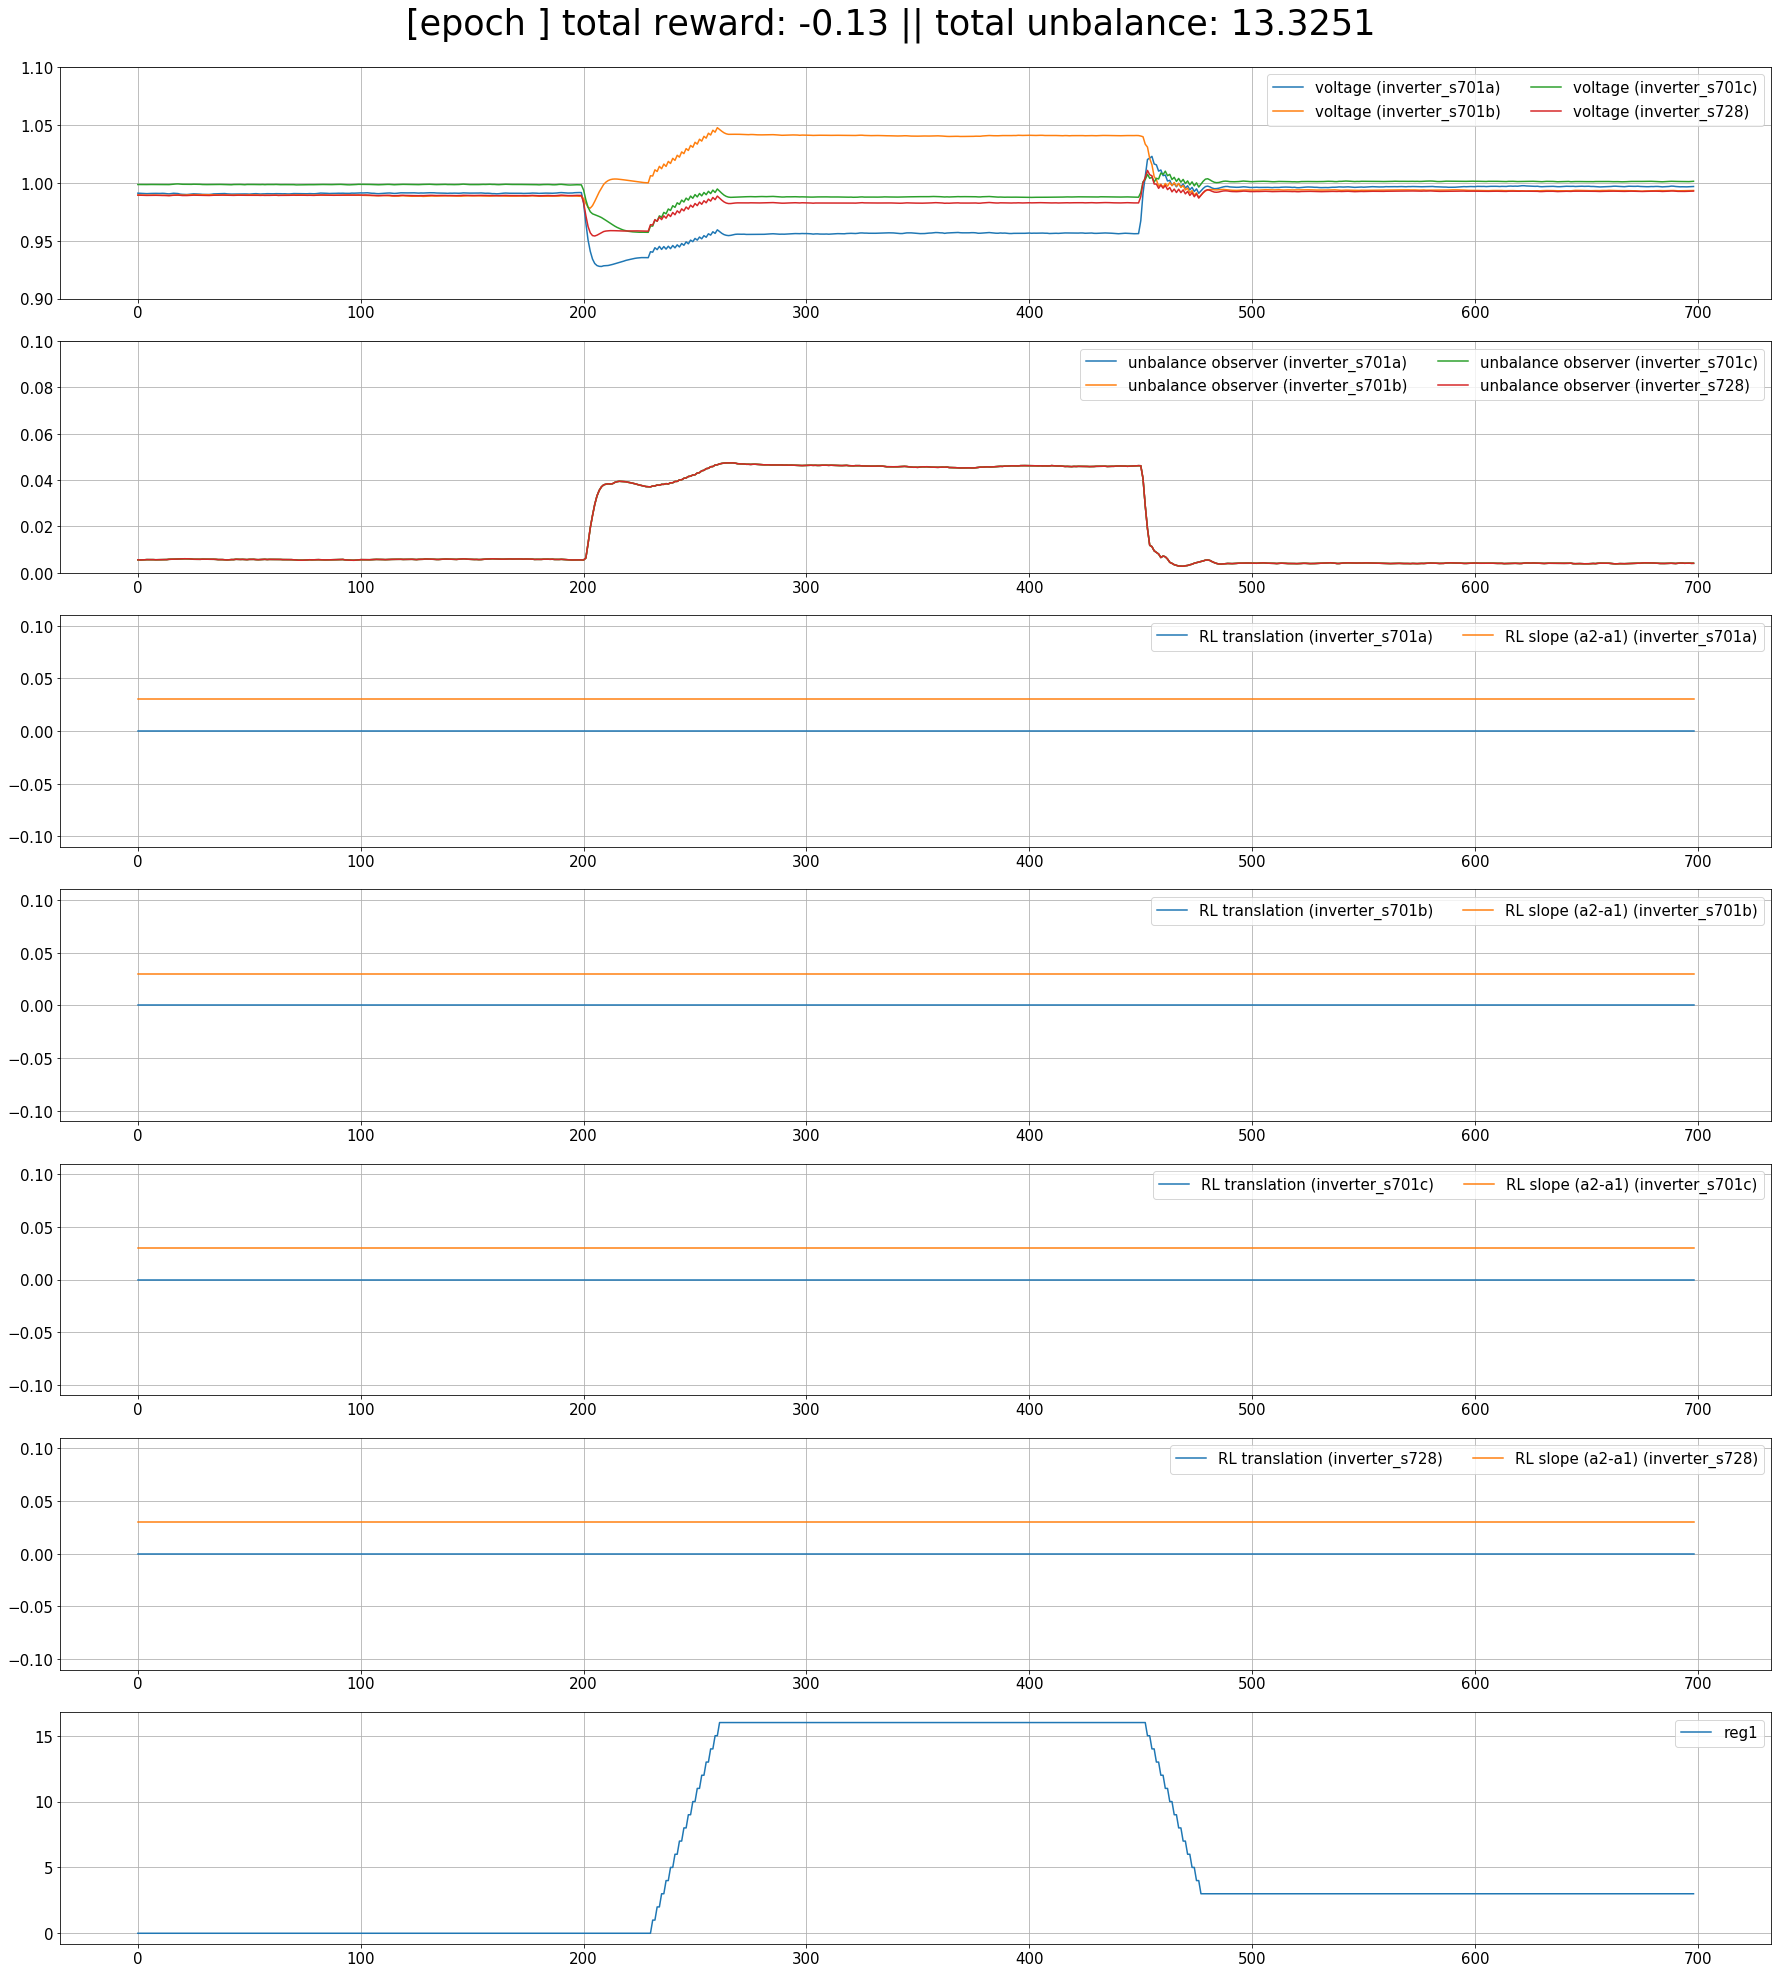

In [8]:
from pycigar.utils.output import plot_new

plot_new(Logger.log_dict, Logger.custom_metrics, unbalance=True)

<function matplotlib.pyplot.show(*args, **kw)>

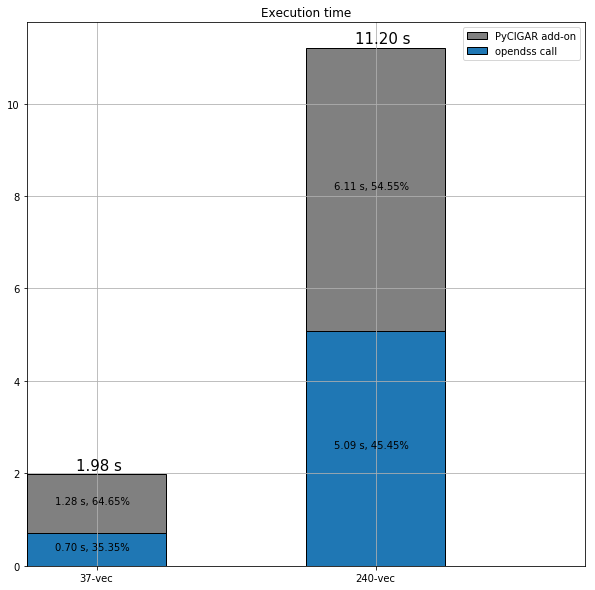

In [30]:
import pandas as pd
ieee37 = {}
ieee37['ttal env'] = 1.98
ieee37['opendss call'] = 0.7

ieee240 = {}
ieee240['ttal env'] = 11.2
ieee240['opendss call'] = 5.09

def making_df(d):
    df = pd.DataFrame(dict(
        opendss_call= [d['opendss call'], 0], 
        ttal_env= [d['ttal env'], 0],
        ))

    return df

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 10))
plt.grid()
plt.title('Execution time')
df = making_df(ieee37)
old_filter = [plt.bar([0, 1], df.ttal_env, align='edge', edgecolor='black', width= 0.2, color='grey',label='PyCIGAR add-on'),
               plt.bar([0, 1], df.opendss_call, align='edge', edgecolor='black', width= 0.2, label='opendss call',  color='#1f77b4'),
               ]

plt.text(x=0.07, y=(df.ttal_env[0]+0.1), s="{:4.2f} s".format(df.ttal_env[0]) , fontdict=dict(fontsize=15))
plt.text(x=0.04, y=(df.ttal_env[0]-df.opendss_call[0])/2+df.opendss_call[0], s="{:4.2f} s, {:.2f}%".format(df.ttal_env[0]-df.opendss_call[0], (1-df.opendss_call[0]/df.ttal_env[0])*100) , fontdict=dict(fontsize=10))
plt.text(x=0.04, y=df.opendss_call[0]/2 , s="{:4.2f} s, {:.2f}%".format(df.opendss_call[0], (df.opendss_call[0]/df.ttal_env[0])*100) , fontdict=dict(fontsize=10))

df = making_df(ieee240)
old_filter = [plt.bar([0+0.4, 1], df.ttal_env, align='edge', edgecolor='black', width= 0.2, color='grey'),
               plt.bar([0+0.4, 1], df.opendss_call, align='edge', edgecolor='black', width= 0.2,  color='#1f77b4'),
               ]

plt.text(x=0.07+0.4, y=(df.ttal_env[0]+0.1), s="{:4.2f} s".format(df.ttal_env[0]) , fontdict=dict(fontsize=15))
plt.text(x=0.04+0.4, y=(df.ttal_env[0]-df.opendss_call[0])/2+df.opendss_call[0], s="{:4.2f} s, {:.2f}%".format(df.ttal_env[0]-df.opendss_call[0], (1-df.opendss_call[0]/df.ttal_env[0])*100) , fontdict=dict(fontsize=10))
plt.text(x=0.04+0.4, y=df.opendss_call[0]/2 , s="{:4.2f} s, {:.2f}%".format(df.opendss_call[0], (df.opendss_call[0]/df.ttal_env[0])*100) , fontdict=dict(fontsize=10))

plt.xticks([0+0.1, 0+0.5], ['37-vec', '240-vec'])
plt.xlim(0, 0.8)
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

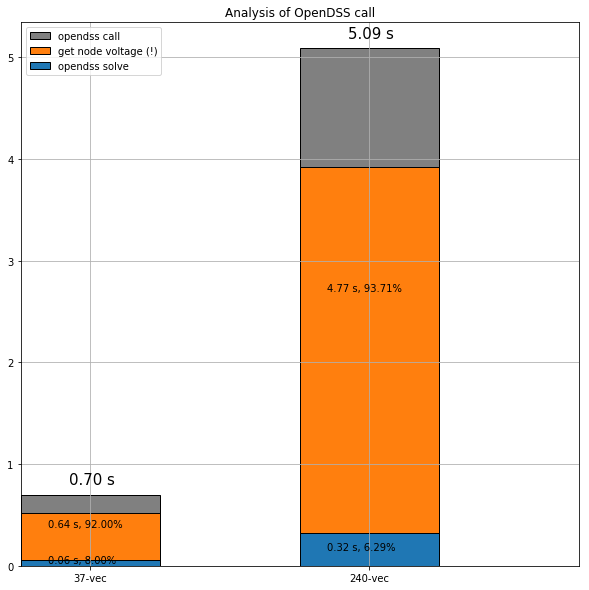

In [33]:
import pandas as pd
ieee37 = {}
ieee37['ttal env'] = 0.7
ieee37['opendss call'] = 0.056
ieee37['middle'] = 0.46
ieee240 = {}
ieee240['ttal env'] = 5.09
ieee240['opendss call'] = 0.32
ieee240['middle'] = 3.6

def making_df(d):
    df = pd.DataFrame(dict(
        opendss_call= [d['opendss call'], 0, 0], 
        middle=[d['middle'], 0, 0], 
        ttal_env= [d['ttal env'], 0, 0],
        ))

    return df

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 10))
plt.grid()
plt.title('Analysis of OpenDSS call')
df = making_df(ieee37)
old_filter = [plt.bar([0, 1, 2], df.ttal_env, align='edge', edgecolor='black', width= 0.2, color='grey',label='opendss call'),
              plt.bar([0, 1, 2], df.middle + df.opendss_call, align='edge', edgecolor='black', width= 0.2, label='get node voltage (!)',  color='#ff7f0e'),
               plt.bar([0, 1, 2], df.opendss_call, align='edge', edgecolor='black', width= 0.2, label='opendss solve',  color='#1f77b4'),
               ]

plt.text(x=0.07, y=(df.ttal_env[0]+0.1), s="{:4.2f} s".format(df.ttal_env[0]) , fontdict=dict(fontsize=15))
plt.text(x=0.04, y=(df.ttal_env[0]-df.opendss_call[0])/2+df.opendss_call[0], s="{:4.2f} s, {:.2f}%".format(df.ttal_env[0]-df.opendss_call[0], (1-df.opendss_call[0]/df.ttal_env[0])*100) , fontdict=dict(fontsize=10))
plt.text(x=0.04, y=df.opendss_call[0]/2 , s="{:4.2f} s, {:.2f}%".format(df.opendss_call[0], (df.opendss_call[0]/df.ttal_env[0])*100) , fontdict=dict(fontsize=10))

df = making_df(ieee240)
old_filter = [plt.bar([0+0.4, 1, 2], df.ttal_env, align='edge', edgecolor='black', width= 0.2, color='grey'),
              plt.bar([0+0.4, 1, 2], df.middle + df.opendss_call, align='edge', edgecolor='black', width= 0.2,  color='#ff7f0e'),
               plt.bar([0+0.4, 1, 2], df.opendss_call, align='edge', edgecolor='black', width= 0.2,  color='#1f77b4'),
               ]

plt.text(x=0.07+0.4, y=(df.ttal_env[0]+0.1), s="{:4.2f} s".format(df.ttal_env[0]) , fontdict=dict(fontsize=15))
plt.text(x=0.04+0.4, y=(df.ttal_env[0]-df.opendss_call[0])/2+df.opendss_call[0], s="{:4.2f} s, {:.2f}%".format(df.ttal_env[0]-df.opendss_call[0], (1-df.opendss_call[0]/df.ttal_env[0])*100) , fontdict=dict(fontsize=10))
plt.text(x=0.04+0.4, y=df.opendss_call[0]/2 , s="{:4.2f} s, {:.2f}%".format(df.opendss_call[0], (df.opendss_call[0]/df.ttal_env[0])*100) , fontdict=dict(fontsize=10))

plt.xticks([0+0.1, 0+0.5], ['37-vec', '240-vec'])
plt.xlim(0, 0.8)
plt.legend()
plt.show